<a href="https://colab.research.google.com/github/0x-d15c0/ACM-SIGAI-TASKS/blob/main/Task_01_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
rows,cols = 28,28

We need to process images to be of the format (batch_size, height, width, channels) , to avoid inconsistencies while training the network .


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape
print(x_train.shape[0])
print(x_train.shape[1])


60000
28
28


In [ ]:
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_train.shape[1],x_test.shape[2],1))

Normalizing the pixel values

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

Plot the figures

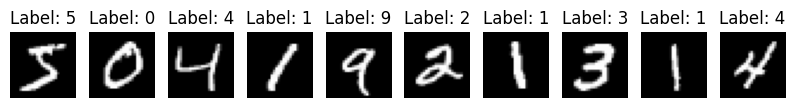

In [ ]:
def plot_images(imgs,labels,img_num):
  plt.figure(figsize=(10,10))
  for i in range(img_num):
    plt.subplot(1,img_num,i+1)
    plt.imshow(imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
  plt.show()

plot_images(x_train, y_train, 10)

In [ ]:
input_shape = x_train.shape[1:]
input_shape

(28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

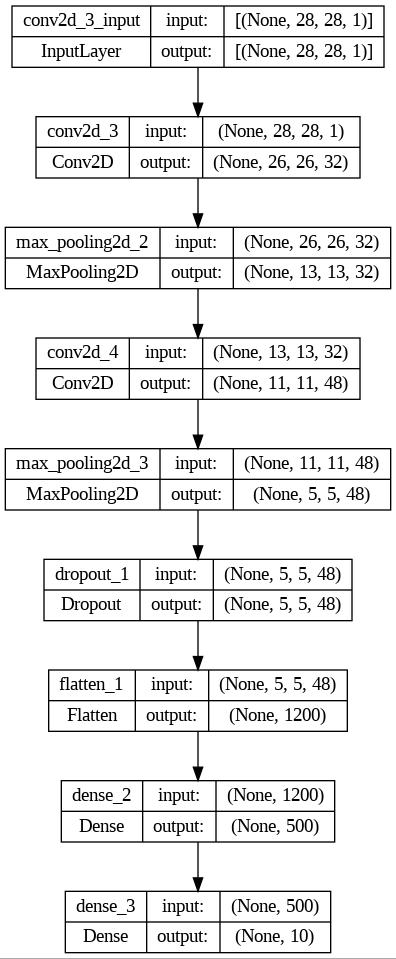

In [ ]:
plot_model(model,'model.jpg',show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    verbose=2,
                    validation_data=(x_test, y_test))

Epoch 1/20
469/469 - 46s - loss: 0.1622 - accuracy: 0.9505 - val_loss: 0.0540 - val_accuracy: 0.9834 - 46s/epoch - 98ms/step
Epoch 2/20
469/469 - 48s - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.0380 - val_accuracy: 0.9869 - 48s/epoch - 103ms/step
Epoch 3/20
469/469 - 46s - loss: 0.0570 - accuracy: 0.9822 - val_loss: 0.0336 - val_accuracy: 0.9889 - 46s/epoch - 99ms/step
Epoch 4/20
469/469 - 47s - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0290 - val_accuracy: 0.9898 - 47s/epoch - 100ms/step
Epoch 5/20
469/469 - 50s - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0247 - val_accuracy: 0.9914 - 50s/epoch - 106ms/step
Epoch 6/20
469/469 - 53s - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0202 - val_accuracy: 0.9927 - 53s/epoch - 114ms/step
Epoch 7/20
469/469 - 49s - loss: 0.0305 - accuracy: 0.9905 - val_loss: 0.0233 - val_accuracy: 0.9924 - 49s/epoch - 105ms/step
Epoch 8/20
469/469 - 50s - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0234 - val_accuracy: 0.9913 - 50s/epoch - 107ms

In [ ]:
loss , accuracy = model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy : {accuracy*100}')

Accuracy : 99.36000108718872


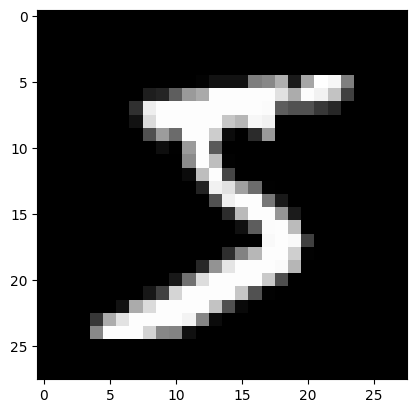

1/1 [==============================] - 0s 177ms/step
Predicted : 5


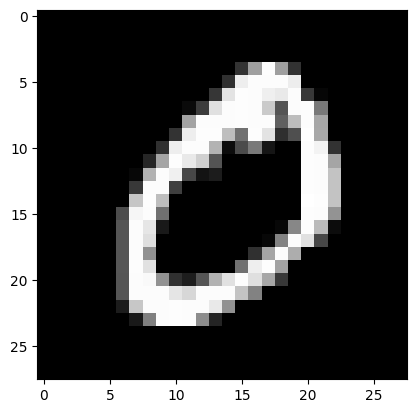

1/1 [==============================] - 0s 32ms/step
Predicted : 0


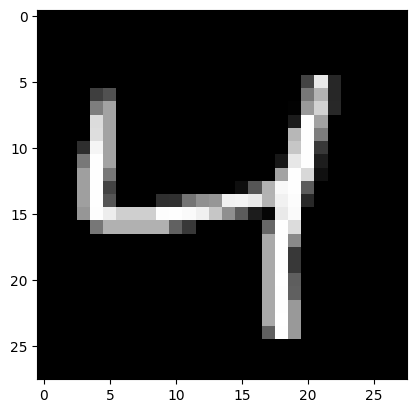

1/1 [==============================] - 0s 31ms/step
Predicted : 4


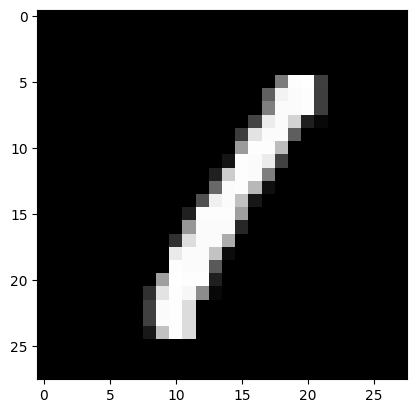

1/1 [==============================] - 0s 22ms/step
Predicted : 1


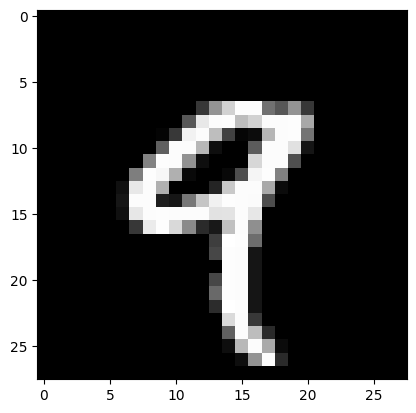

1/1 [==============================] - 0s 21ms/step
Predicted : 9


In [ ]:
for i in range(5):
  image = x_train[i]
  plt.imshow(np.squeeze(image),cmap='gray')
  plt.show()
  image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
  p = model.predict([image])
  print('Predicted : {}'.format(argmax(p)))